## Objective of the notebook

기계학습 예제 데이터들을 모아둔 사이트 [UCI Machine Learning Repository: Data Sets](https://archive.ics.uci.edu/ml/datasets.html)에서 Heart Disease dataset에 대한 탐색을 하고, Sklearn의 SVC 분류모델을 이용하여 target을 분류하는 과정을 알아보고자 한다.

**분석하기에 앞서 데이터에 대한 이해가 충분히 되어야 한다. 그러므로 데이터의 출처에 대해서 확인하고 데이터에 대해서 알아본다.**

## About the dataset: Heart Disease

Heart Disease의 원 자료는 총 76개의 변수들로 이루어져 있으나, 공개된 모든실험에서 사용한 14개 변수로 이루어진 데이터셋을 이용하고자 한다. 이 노트에서는 최근까지 연구된 Cleveland database를 이용하였으며, 이 데이터셋은 총 303명의 환자의 데이터이다.

데이터 출처:

https://www.kaggle.com/ronitf/heart-disease-uci

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
heart_df = pd.read_csv("https://raw.githubusercontent.com/taejinhyun/sklearn_models/master/Heart%20Disease/heart.csv")

## 데이터 설명
데이터에 대한 척도와 측정방법을 파악을 해야 데이터에 대한 처리를 정확히 할 수 있다.<br>
아래 페이에서 Heart Disease 데이터셋의 변수들에 대한 척도와 측정방법이 설명되어 있다.<br>
https://github.com/sung-hyo/sklearn_study/blob/master/Heart%20data%20description.ipynb

In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 데이터 탐색

결측치를 확인하고 변수들이 어떤 값을 갖고 어떤 분포를 가지는지 파악해보자.

In [4]:
#변수별 결측치 확인
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

눈으로 보이는 결측치는 없지만 데이터를 살펴보면 `ca`변수에서 4라는 값은 알수없는 값이기 때문에 결측치로 판단하여 제거한다.

In [10]:
heart_df = heart_df[heart_df["ca"] != 4]

In [11]:
# 데이터에 대한 정보
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 302
Data columns (total 14 columns):
age         298 non-null int64
sex         298 non-null int64
cp          298 non-null int64
trestbps    298 non-null int64
chol        298 non-null int64
fbs         298 non-null int64
restecg     298 non-null int64
thalach     298 non-null int64
exang       298 non-null int64
oldpeak     298 non-null float64
slope       298 non-null int64
ca          298 non-null int64
thal        298 non-null int64
target      298 non-null int64
dtypes: float64(1), int64(13)
memory usage: 34.9 KB


In [12]:
# 데이터에 대한 처리를 편하게 하기 위하여 범주형 변수와 수치형 변수를 구분시켜 준다.
category_features = ['sex','cp','restecg','exang','slope','thal', 'ca', "fbs"]
numeric_features = ['age','trestbps','chol','thalach','oldpeak']

In [13]:
# 범주형 변수가 수치형 변수로 되어있기 때문에 범주형으로 변환한다.
for i in category_features:
    heart_df[i]=pd.Categorical(heart_df[i])

In [14]:
# 범주형 변수들의 unique 값을 확인
for i in category_features:
    print(i, ':', list(heart_df[i].unique()))

sex : [1, 0]
cp : [3, 2, 1, 0]
restecg : [0, 1, 2]
exang : [0, 1]
slope : [0, 2, 1]
thal : [1, 2, 3, 0]
ca : [0, 2, 1, 3]
fbs : [1, 0]


In [15]:
# 범주형 변수들의 요약(count, unique, mode, freqency)
heart_df[category_features].describe().T

,count,unique,top,freq
sex,298,2,1,202
cp,298,4,0,142
restecg,298,3,1,148
exang,298,2,0,200
slope,298,3,2,139
thal,298,4,2,163
ca,298,4,0,175
fbs,298,2,0,254


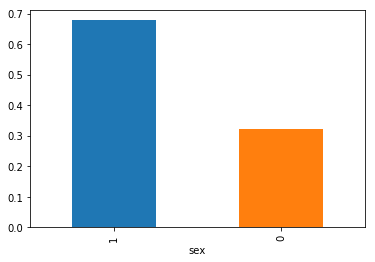

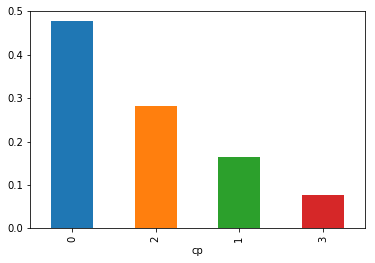

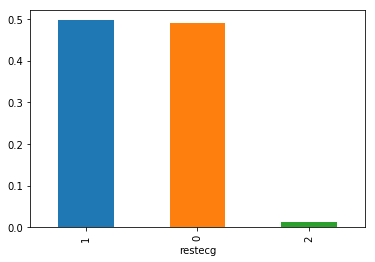

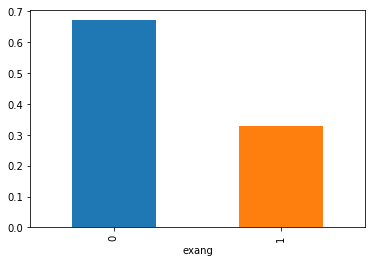

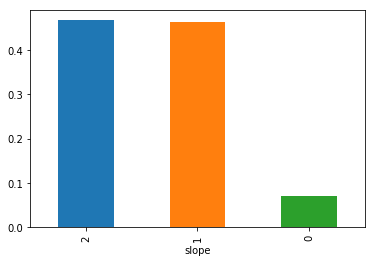

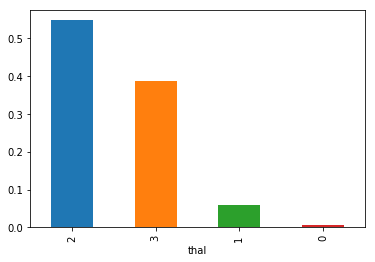

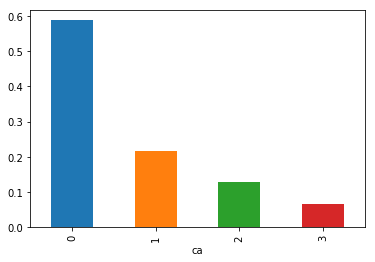

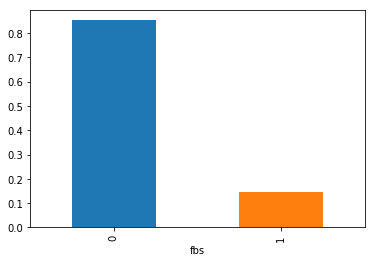

In [16]:
# 명목형 변수들의 상대도수 그래프
for i in category_features:
    heart_df[i].value_counts(normalize=True).plot(kind='bar')
    plt.xlabel(i)
    plt.show()

In [17]:
# 수치형 변수들의 요약(count, mean, std, min, quartile, max)
heart_df[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,298.0,54.510067,9.030526,29.0,48.0,56.0,61.00,77.0
trestbps,298.0,131.580537,17.669293,94.0,120.0,130.0,140.00,200.0
chol,298.0,246.906040,51.893097,126.0,211.0,241.5,275.00,564.0
thalach,298.0,149.466443,22.983830,71.0,133.0,152.5,165.75,202.0
oldpeak,298.0,1.055369,1.164162,0.0,0.0,0.8,1.60,6.2


C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


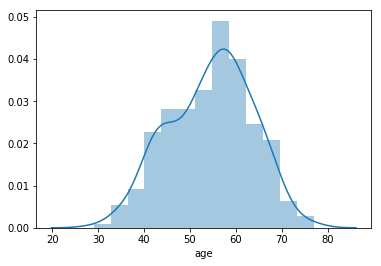

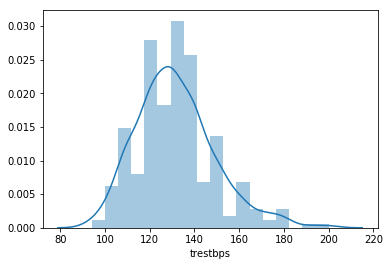

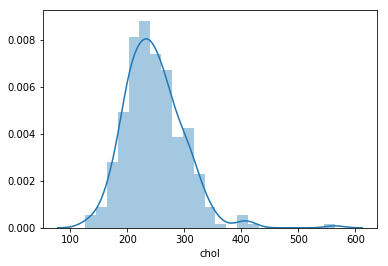

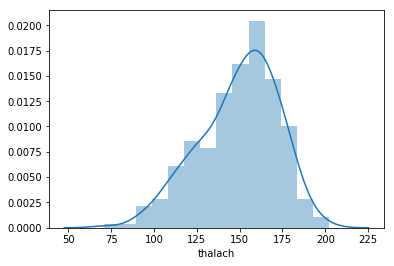

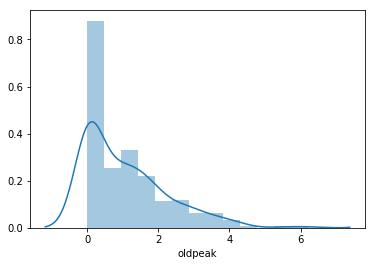

In [18]:
# 연속형 변수들의 분포
for i in numeric_features:
    sns.distplot(heart_df[i])
    plt.xlabel(i)
    plt.show()

### target 변수에 대한 탐색

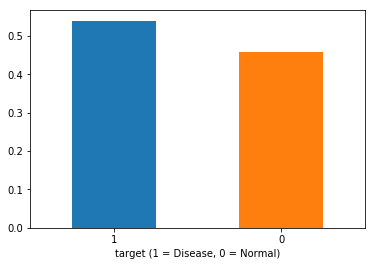

1    0.540268
0    0.459732
Name: target, dtype: float64


In [21]:
#target 변수의 상대도수를 확인
heart_df['target'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("target (1 = Disease, 0 = Normal)")
plt.xticks(rotation=0)
plt.show()
print(heart_df['target'].value_counts(normalize=True))

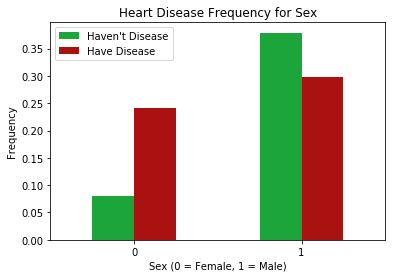

In [22]:
# 성별에 따른 target(심장병 여부)의 교차표를 통한 상대도수 그래프
pd.crosstab(heart_df.sex, heart_df.target, normalize='all').plot(kind="bar", color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

## 데이터 전처리

In [23]:
# 데이터셋에서 target과 features를 나누어준다.
target_df = heart_df['target']
features_df = heart_df.drop(columns = ['target'], axis = 1)

In [24]:
# feature_df에서 범주형 변수들을 더미변수로 변환한다.
features_dummy_df = pd.get_dummies(features_df)

In [25]:
features_dummy_df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0


In [26]:
# feature_df에서 연속형 변수들을 sacaling 한다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(heart_df[numeric_features])
features_dummy_df[numeric_features] = scaler.transform(features_dummy_df[numeric_features])

In [27]:
features_dummy_df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2,thal_3
0,0.941719,0.760757,-0.268426,0.023254,1.070920,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,-1.942248,-0.089602,0.059722,1.635789,2.103438,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,-1.498561,-0.089602,-0.828207,0.982058,0.296531,1,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
3,0.165266,-0.656507,-0.210517,1.243550,-0.219728,0,1,0,1,0,...,0,1,1,0,0,0,0,0,1,0
4,0.276188,-0.656507,2.067213,0.589820,-0.391814,1,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0


In [28]:
# train데이터와 test를 나눈다.
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_dummy_df, target_df, random_state=0)

In [29]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2,thal_3
165,1.385406,1.611115,0.754623,-1.807192,0.382574,0,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
90,-0.722108,-0.429745,0.156236,1.112804,-0.908073,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
249,1.607249,0.477304,0.136933,-0.151075,0.812790,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1
161,0.054344,0.023780,1.835580,0.720566,0.124445,1,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
204,0.830797,1.611115,-1.600319,-0.194657,4.426603,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [30]:
print(y_train.shape)
print(X_train.shape)

(223,)
(223, 29)


-------------------------

## 커널, 차원 축소, 확장 같은 듣기만해도 어려운 용어들을 빼고 최대한  간단한 용어로 간단하게 설명하려고 노력했습니다.. ㅎ

# Support Vector Classification


---
    데이터를 분류할 수 있는 초평면(점선)의 마진(분류 데이터 사이의 거리)을 최대화하여 기준이 되는 경계(support vector)로 분류경계면을 찾는 방법이다. 
![svm](http://1.bp.blogspot.com/-NXaQRDHnCM0/Wmxciwina8I/AAAAAAAACgc/T8UKdKZSx7glaauna_-_sMPjrHSSbmo6QCK4BGAYYCw/s1600/svm5.png)

## 재현성을 위한 Random_state 고정

In [22]:
RANDOM_STATE=11

In [26]:
from sklearn.model_selection import StratifiedKFold 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## SVC의 kernel 파라미터를 poly로 고정 후 데이터에 대해 학습하고 성능을 측정하였다.

In [48]:
from sklearn.svm import SVC
svc = SVC(kernel='poly',random_state=RANDOM_STATE).fit(X_train, y_train)
kenal_p=svc.score(X_test, y_test)
svc.score(X_test, y_test)

0.7763157894736842

## Confusion matrix를 사용하면 test결과에 대한 분류결과를 직관적으로 확인할 수 있다.

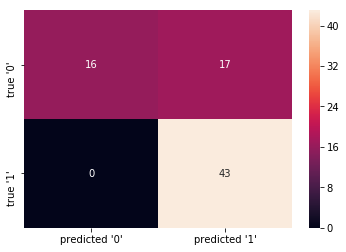

In [73]:
pred = svc.predict(X_test)
confusion = confusion_matrix(y_test, pred)
kernel_p=plt.figure()
figsize=(5, 5)
sns.heatmap(confusion, annot=True, fmt="d")
plt.xticks([.5, 1.5], ["predicted '0'", "predicted '1'"], size=10)
plt.yticks([.5, 1.5], ["true '0'", "true '1'"], size=10)
plt.show()

## CrossValidation(k-fold, Gridsearch cv)
---
    Test 데이터에 대한 한번의 분류, 회귀 결과를 믿고 사용해도 되는가에 대한 의심으로 연구된 방법으로 학습시 train 데이터를 여러 층으로 나누어 validation를 정해 검증해가며 실행하는 방법이며 이를 통해 최적의 hyper-parameter를 찾을 수 있다.

![kfold](http://www.ds100.org/sp17/assets/notebooks/linear_regression/train_test_split.png)

In [50]:
kfold = StratifiedKFold(n_splits=5, random_state=RANDOM_STATE)

## Gridsearch cv
 hyper parameter들을 dictionary 형식으로 지정하고 그리드서치를 사용하면 cross validation을 통해 가장 성능이 좋은 모델을 찾을 수 있다.

In [51]:
from sklearn.model_selection import GridSearchCV 
params = {'kernel':['poly','sigmoid','rbf'],'gamma':[0.0001, 0.001,0.01, 0.05, 0.07, 0.1,0.5]}

In [76]:
svc_grid=GridSearchCV(SVC(), params, cv=kfold)

In [77]:
svc_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['poly', 'sigmoid', 'rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.05, 0.07, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## 앞선 모델보다 0.7가량 정확도가 올라감을 확인할 수 있다.

In [78]:
svc_grid.score(X_test,y_test)

0.8421052631578947

## 가장 좋은 모델에 사용한 파라미터들을 확인할 수 있다.

In [79]:
svc_grid.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
pred = svc_grid.predict(X_test)
g_confusion = confusion_matrix(y_test, pred)
p_pred=svc.predict(X_test)
confusion = confusion_matrix(y_test, p_pred)

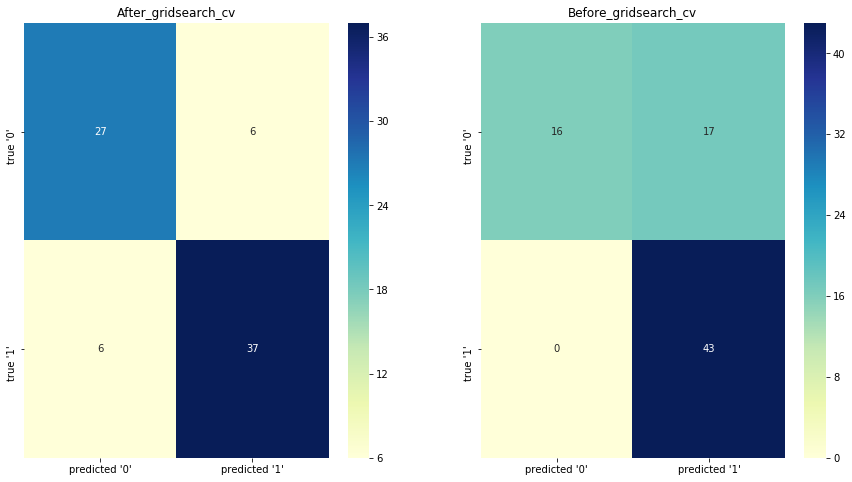

In [118]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.heatmap(g_confusion, annot=True, fmt="d",cmap="YlGnBu")
plt.xticks([.5, 1.5], ["predicted '0'", "predicted '1'"], size=10)
plt.yticks([.5, 1.5], ["true '0'", "true '1'"], size=10)
plt.title('After_gridsearch_cv')

plt.subplot(1, 2, 2)
sns.heatmap(confusion, annot=True, fmt="d",cmap="YlGnBu")
plt.xticks([.5, 1.5], ["predicted '0'", "predicted '1'"], size=10)
plt.yticks([.5, 1.5], ["true '0'", "true '1'"], size=10)
plt.title('Before_gridsearch_cv')

plt.show()